<a href="https://colab.research.google.com/github/Rochakr4/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#library used
import pandas as pd
import numpy as np
import plotly.express as px  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

##Initial preprocessing 

Initial preprocessing, which includes,

•	Handling NaN values

•	Necessary feature changes


In [4]:
print(f'Shape of data set is {bike_df.shape}')

Shape of data set is (8760, 14)


In [5]:
#list of features present in dataset
list(bike_df)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [6]:
#Running info() inorder to get information regarding NaN values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#How data set look like
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



*   The data set does not contain any Nan values






In [8]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000




*   Feature like Rainfall and Snowfall has zero as 75% of there values
*   Solar Radiation (MJ/m2) feature has 50% zero values



In [9]:
#Creating new feature for further analysis
bike_df['Solar Radiation']=bike_df['Solar Radiation (MJ/m2)']*0
bike_df['Rainfall']=bike_df['Solar Radiation (MJ/m2)']*0
bike_df['Snowfall']=bike_df['Solar Radiation (MJ/m2)']*0

In [10]:
#Converting some numerical features to categorical feature for better understandability
for col in ['Solar Radiation (MJ/m2)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Solar Radiation'][i]='low radiation'
    if (bike_df[col][i]>0) and (bike_df[col][i]<=0.93):
      bike_df['Solar Radiation'][i]='Moderate radiation'
    if bike_df[col][i]>0.93:
      bike_df['Solar Radiation'][i]='High radiation'

for col in ['Rainfall(mm)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Rainfall'][i]='No rain'
    else:
      bike_df['Rainfall'][i]='rain'

for col in ['Snowfall (cm)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Snowfall'][i]='No Snowfall'
    else:
      bike_df['Snowfall'][i]='Snowfall'

In [11]:
#Droping those features which was converted to categorical values
bike_df=bike_df.drop(columns=['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'],axis=1)

In [12]:
#Discribtion of dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000


In [13]:
#Date wise average rented bike count
date_wise=px.line(data_frame=bike_df.groupby('Date')['Rented Bike Count'].mean().reset_index()
                    ,y=['Rented Bike Count'],x='Date',title='Date wise average rented bike count')
date_wise.show()

In [14]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()
#Creating 'weekdays_or_weekend' feature for further analysis
bike_df['weekdays_or_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
#Droping unwanted coloumns
bike_df=bike_df.drop(columns=['Date','day'],axis=1)

In [16]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Seasons,Holiday,Functioning Day,Solar Radiation,Rainfall,Snowfall,month,weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0


In [17]:
#Changing data type of categorical features which was encoded as int64
cols=['Hour','month','weekdays_or_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('object')

In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Seasons                    8760 non-null   object 
 8   Holiday                    8760 non-null   object 
 9   Functioning Day            8760 non-null   object 
 10  Solar Radiation            8760 non-null   object 
 11  Rainfall                   8760 non-null   object 
 12  Snowfall                   8760 non-null   object 
 13  month                      8760 non-null   objec

#Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main
characteristics, often with visual methods. EDA is for seeing what the data can tell us beyond the
formal modeling or hypothesis testing task. It’s where the researcher takes a bird’s eye view of
the data and tries to make some sense of it.

In [27]:
#Month wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('month')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='month',title='Month wise average bike rented')
temp_bar.show()


[Text(0.5, 1.0, 'Analysing hourly data with respect to weekdays and weekends')]

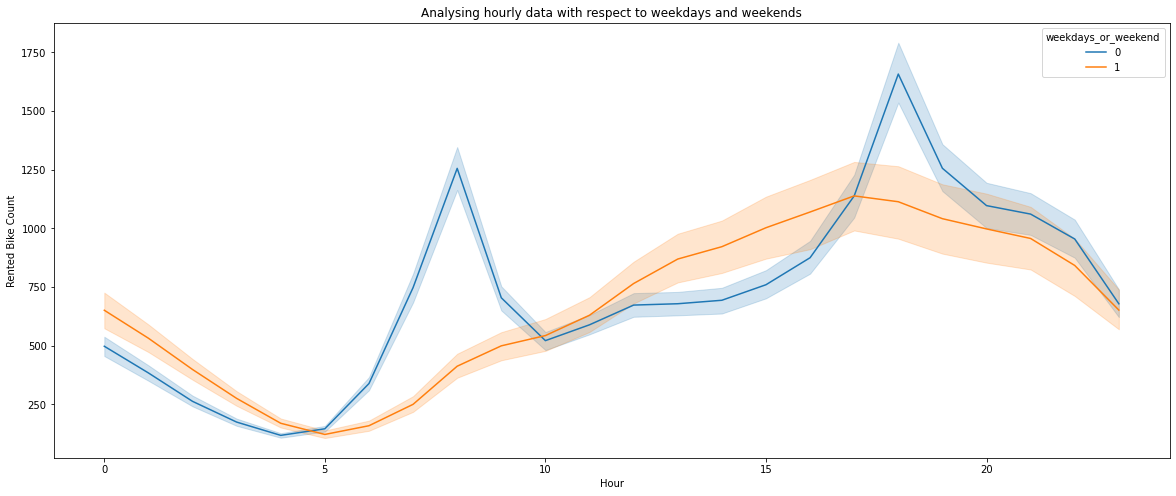

In [19]:
#Comparing weekdays and weekend average rented bike count
change_wise=px.bar(data_frame=bike_df.groupby('weekdays_or_weekend').mean().reset_index(),y=['Rented Bike Count'],x='weekdays_or_weekend',title='Average rented bikes with respect to weekday and weekend')
change_wise.show()
#Analysing hourly average data with respect to weekdays and weekends
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='weekdays_or_weekend',ax=ax)
ax.set(title='Analysing hourly data with respect to weekdays and weekends')


REMARKS:
*   During weekdays two peak time are recorded at 5am to 10am and 4pm to 8pm
*   No such peak times are recorded in case of weekends
*   with out considering the peak times of weekdays, both the graph follows same trajectory
*   Average use of bike is usually high on weekdays compared to weekends







[Text(0.5, 1.0, 'Holiday wise hourly analysis ')]

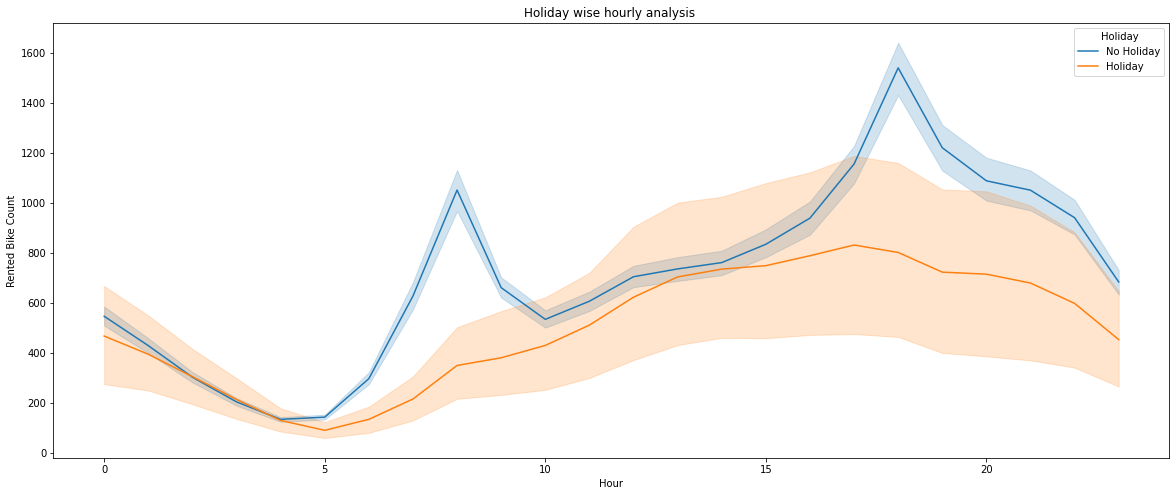

In [20]:
#Holiday wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Holiday')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Holiday',title='Holiday wise average bike rented')
temp_bar.show()

#Holiday wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Holiday')
ax.set(title='Holiday wise hourly analysis ')

REMARKS

*   Patterns are in away similar to that of Weekdays and weekands



[Text(0.5, 1.0, 'Season wise hourly analysis ')]

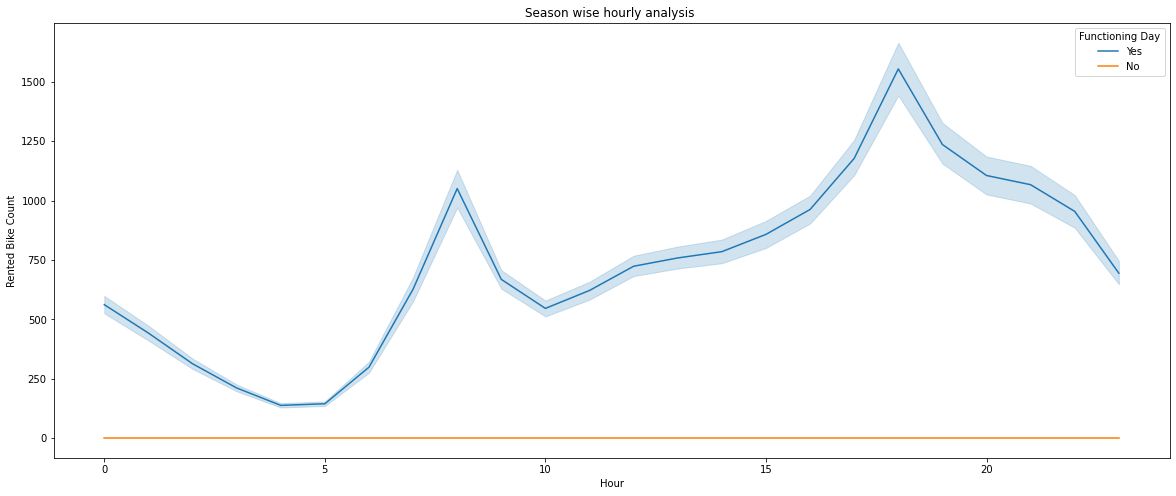

In [21]:
#Functioning Day wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Functioning Day',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Functioning Day wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Functioning Day')
ax.set(title='Season wise hourly analysis ')

REMARKS:
*   Bike use on non funtioning day is zero




[Text(0.5, 1.0, 'Season wise hourly average analysis')]

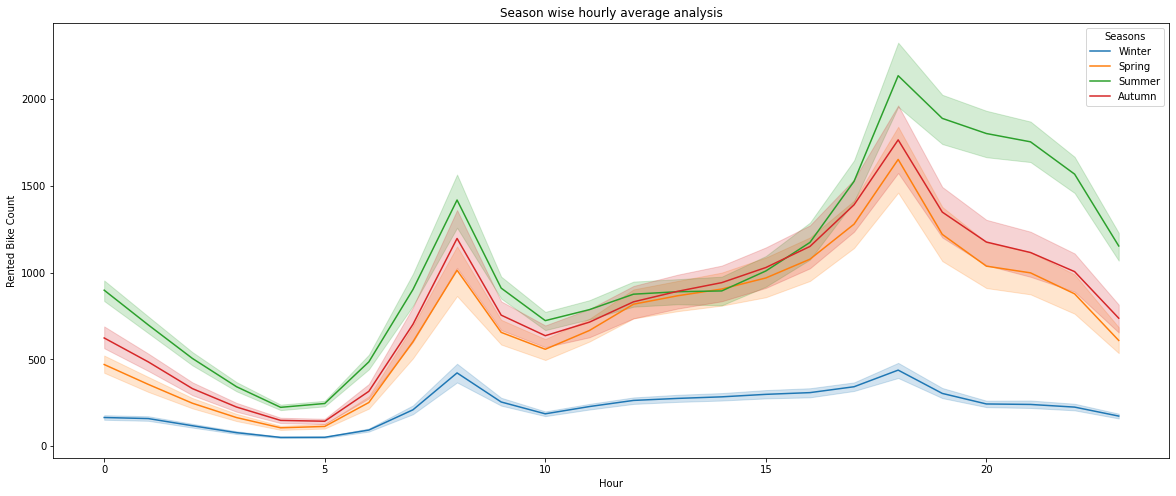

In [23]:
#Season wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Seasons')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Seasons',title='Season wise average bike rented')
temp_bar.show()

#Season wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Seasons')
ax.set(title='Season wise hourly average analysis')

REMARKS:
*   Use of bikes are high in summer followed by autumn, spring and then winter




[Text(0.5, 1.0, 'Hourly analysis with respect to radiation ')]

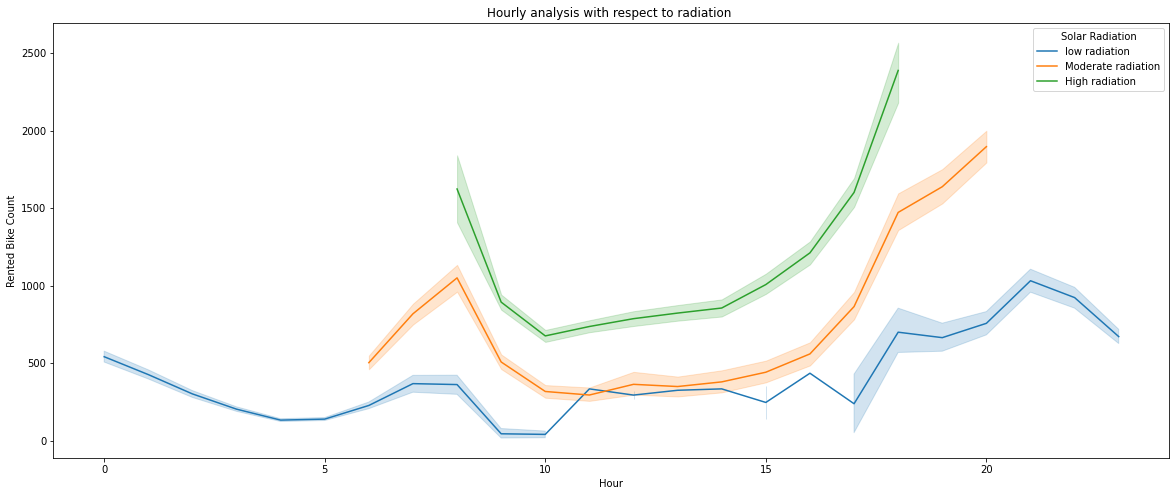

In [24]:
#Solar Radiation wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Solar Radiation')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Solar Radiation',title='Solar Radiation wise average bike rented')
temp_bar.show()

#Radiation wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Solar Radiation')
ax.set(title='Hourly analysis with respect to radiation ')

REMARKS

*   Bike use is high on high radition time followed moderate and then low


[Text(0.5, 1.0, 'Hourly analysis with respect to rainfall')]

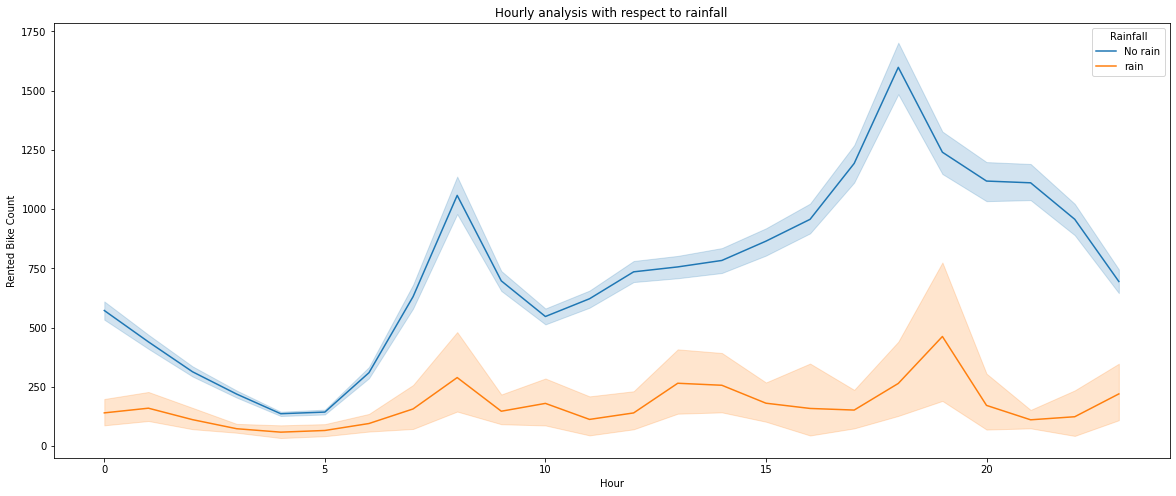

In [25]:
#Rainfall wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Rainfall')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Rainfall',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Rainfall wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Rainfall')
ax.set(title='Hourly analysis with respect to rainfall')

REMARKS:

*   Bike use is less during raining time




[Text(0.5, 1.0, 'Hourly analysis with respect to snowfall')]

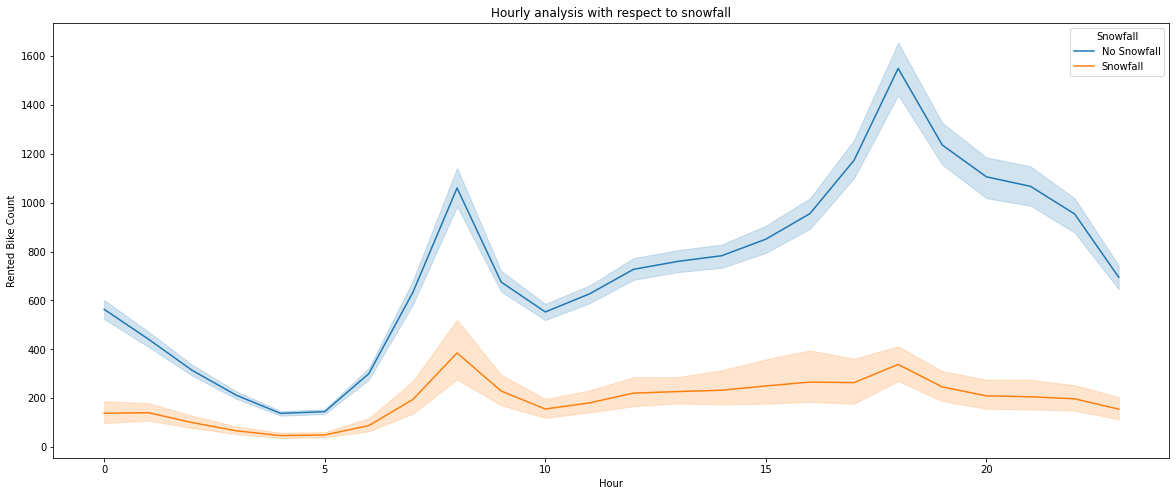

In [26]:
#Snowfall wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Snowfall')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Snowfall',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Snowfall wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Snowfall')
ax.set(title='Hourly analysis with respect to snowfall')


REMARKS:

*   Bike use is less during snowfall time




# Final preprocessing

Final preprocessing. 

•	Feature conditioning and outlier handling.

•	Correlation and multicollinearity analysis.

•	One hot encoding on categorical features


In [28]:
#Making a variable for numerical valued columns for further analysis
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)'],
      dtype='object')

## Feature conditioning and outlier handling


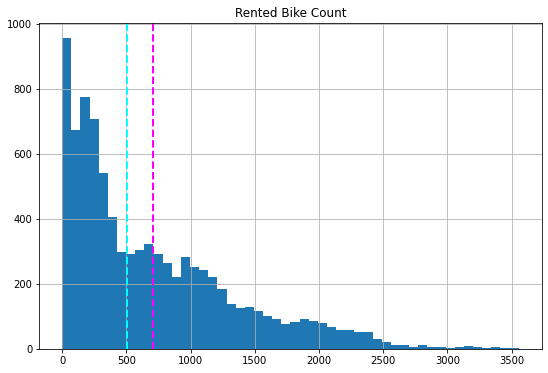

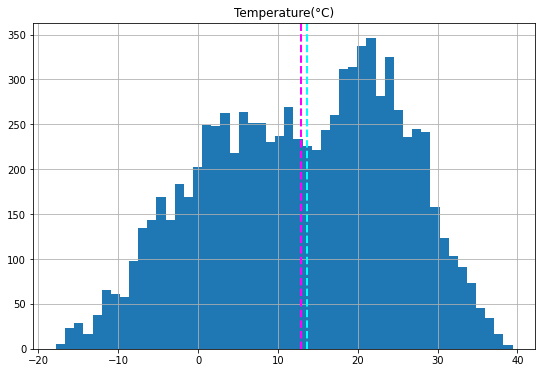

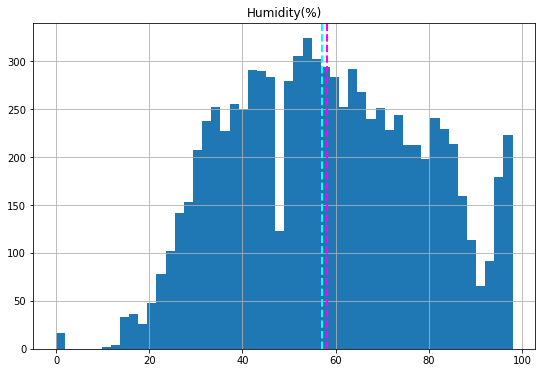

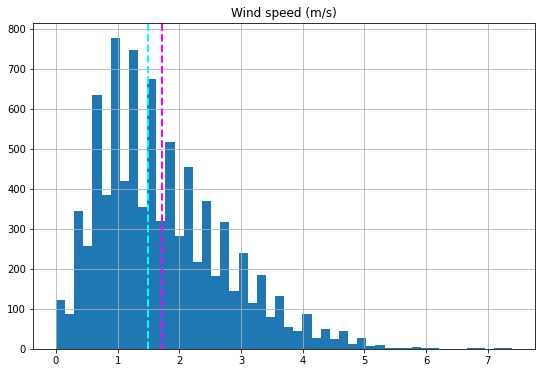

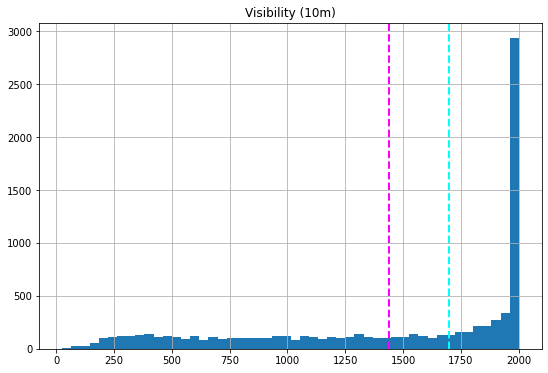

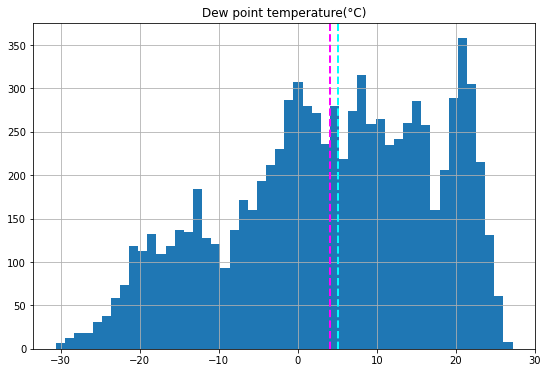

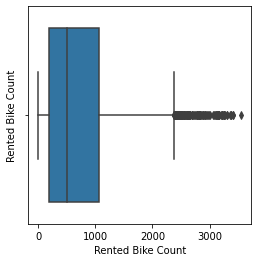

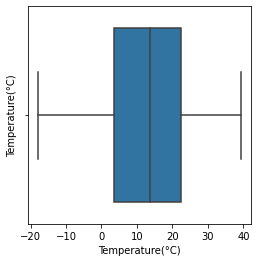

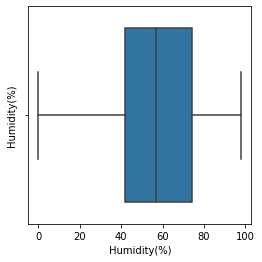

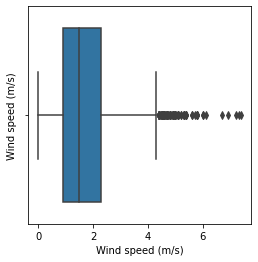

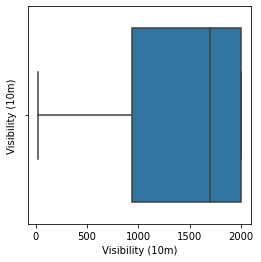

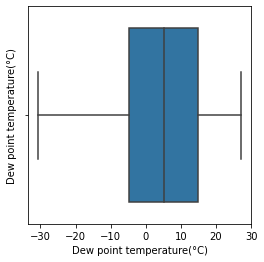

In [29]:
#Hist plot for analysising the data distribution
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = (bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)   
plt.show()

#Box plot for outlier analysis
for col in numerical_features:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(bike_df[col])
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()


REMARKS
*   Here positive skewness is observerd in 'Rented Bike Count' & 'Wind speed (m/s)' features.
*   Here negative skewness is observerd in 'Visibility (10m)' feature.
*   Outliers are observed in  'Rented Bike Count' & 'Wind speed (m/s)' features

Necessary feature transformation and outlier handiling is required for further analysis



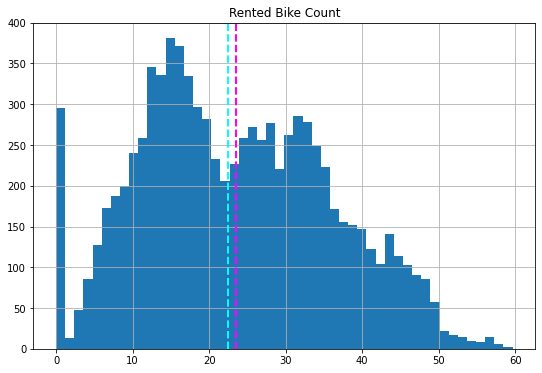

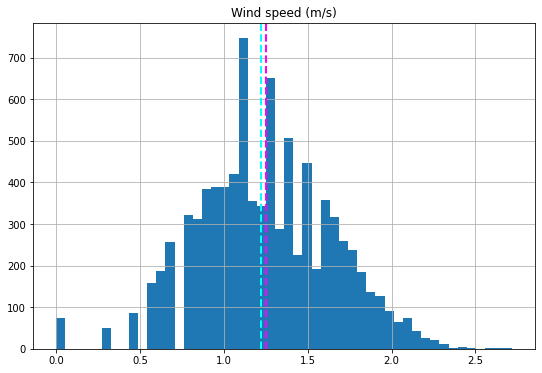

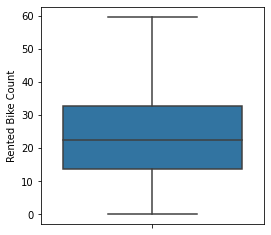

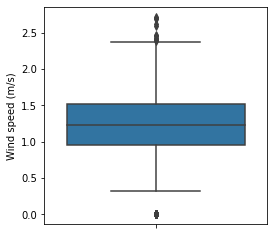

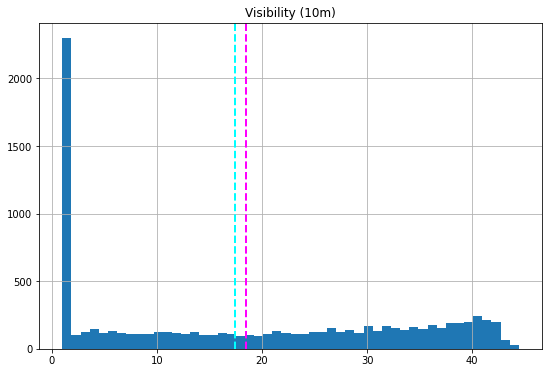

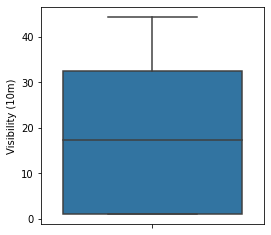

In [30]:
#Sqrt transformation for positively skewed features
#Hist plot for analysising the data distribution
for col in ['Rented Bike Count','Wind speed (m/s)']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
#Box plot for outlier analysis
for col in ['Rented Bike Count','Wind speed (m/s)']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=np.sqrt(bike_df[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()



#sqrt(max(x+1)-x) transformation for negatively skewed features
#Hist plot for analysising the data distribution
for col in ['Visibility (10m)']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(max(bike_df[col]+1) - bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
#Box plot for outlier analysis
for col in ['Visibility (10m)']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=np.sqrt(max(bike_df[col]+1) - bike_df[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()




REMARKS:

*   Acceptable distribution obtained in all features after transformation.
*   Outliers are still observed in 'Wind speed (m/s)' feature.



In [31]:
bike_df_copy=bike_df#creating a copy of dataset for further analysis
#Updating the required feature transformation in the dataset
bike_df_copy['Wind speed (m/s) sqrt']=np.sqrt(bike_df_copy['Wind speed (m/s)'])
bike_df_copy['Rented Bike Count sqrt']=np.sqrt(bike_df_copy['Rented Bike Count'])
bike_df_copy['Visibility (10m) sqrt']=np.sqrt(max(bike_df['Visibility (10m)']+1) - bike_df['Visibility (10m)'])
#droping the transformed features
bike_df_copy=bike_df_copy.drop(columns=['Wind speed (m/s)','Rented Bike Count','Visibility (10m)'], axis=1)
#updating the numerical_features variable
numerical_columns=list(bike_df_copy.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)',
       'Wind speed (m/s) sqrt', 'Rented Bike Count sqrt',
       'Visibility (10m) sqrt'],
      dtype='object')

In order to avoid outliers in 'Wind speed (m/s) sqrt' feature values below IQR method is implemented

In [32]:
#Implementing IQR method to remove outliers
for col in ['Wind speed (m/s) sqrt']:
  q1=bike_df_copy[col].quantile(0.25)
  q3=bike_df_copy[col].quantile(0.75)
  iqr=q3-q1
  
  upper_limit=q3+(1.5*iqr)
  lower_limit=q1-(1.5*iqr)

  bike_df_copy.loc[(bike_df_copy[col] > upper_limit),col] = upper_limit
  bike_df_copy.loc[(bike_df_copy[col] < lower_limit),col] = lower_limit

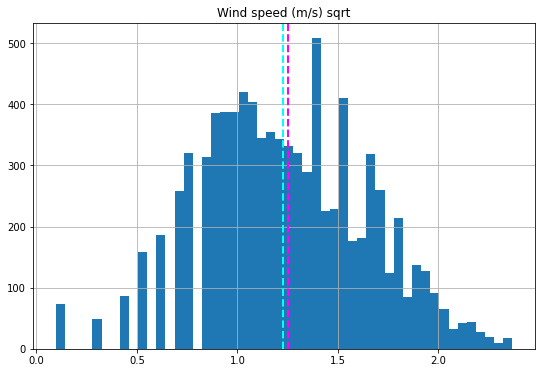

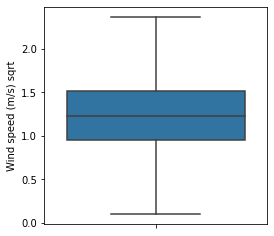

In [33]:
#Further analysis the 'Wind speed (m/s) sqrt' feature
for col in ['Wind speed (m/s) sqrt']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = (bike_df_copy[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

for col in ['Wind speed (m/s) sqrt']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=(bike_df_copy[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()

REMARKS:
*   outlier issue in 'Wind speed (m/s) sqrt' is resolved.

## Correlation and multicolinearity analysis

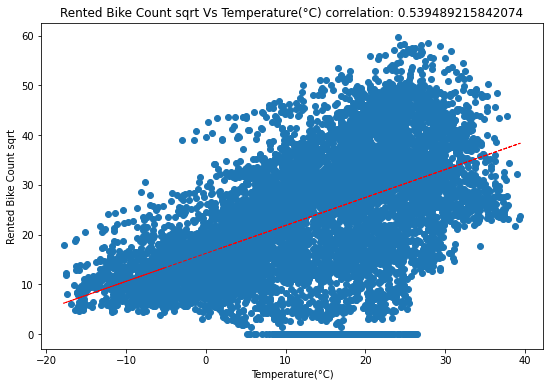

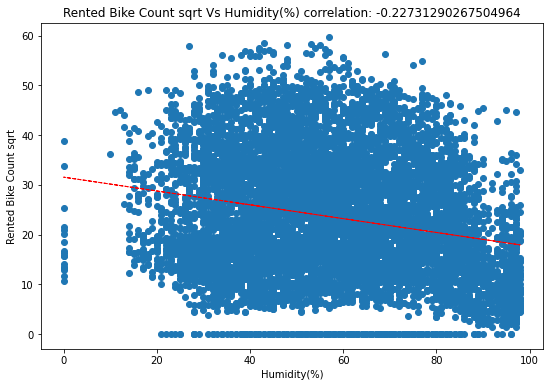

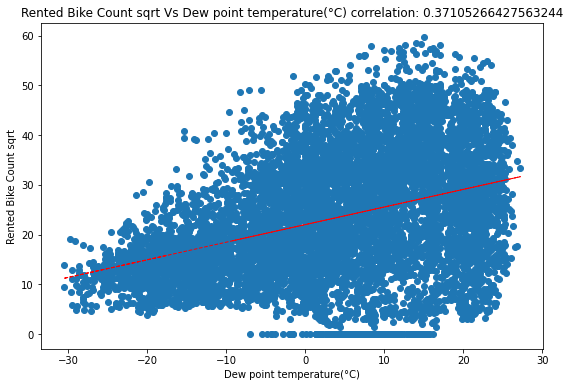

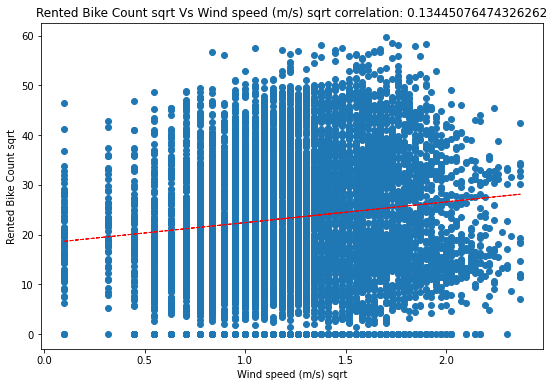

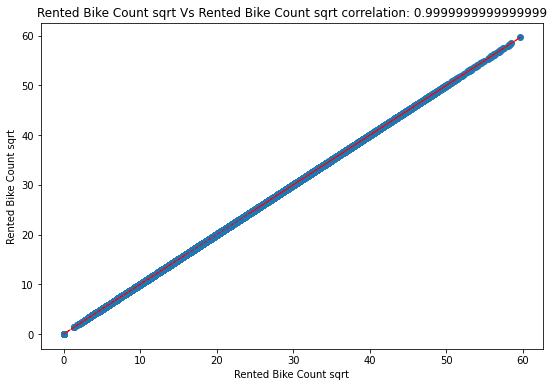

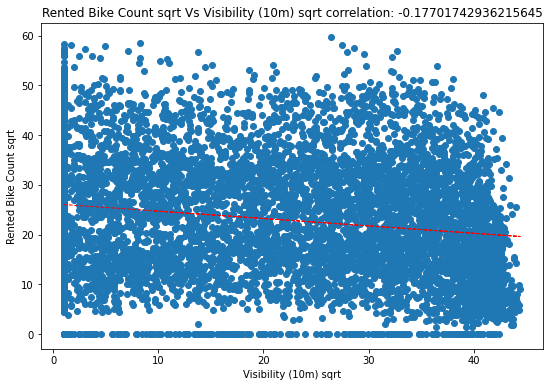

In [34]:
#Target feature vs other features
for col in numerical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=bike_df_copy[col]
    label=bike_df_copy['Rented Bike Count sqrt']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count sqrt')
    ax.set_title('Rented Bike Count sqrt Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(bike_df_copy[col])
    plt.plot(bike_df_copy[col],y_hat,"r--",lw=1)
    plt.show()


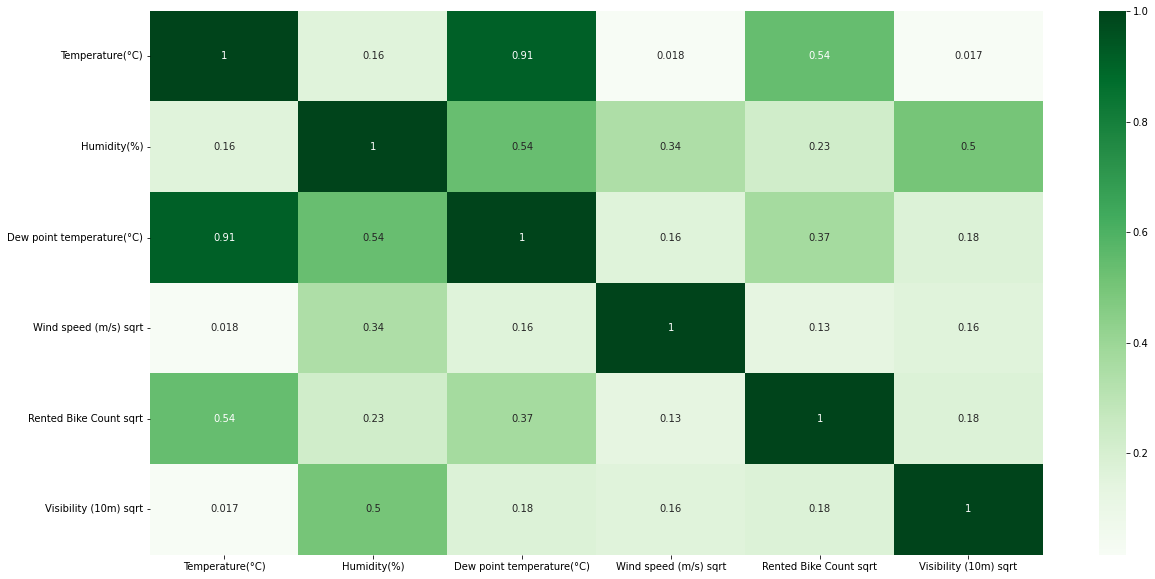

In [35]:
#Correlation plot
plt.figure(figsize=(20,10))
correlation=bike_df_copy[numerical_features].corr()
sns.heatmap(correlation,annot=True,cmap='Greens')

REMARKS:

*   Since 'Dew point temperature(°C)' and 'Temperature(°C)' has correlation of 0.91 'Dew point temperature(°C)' will be dropped from futher analysis




In [36]:
#Dropping 'Dew point temperature(°C)' feature
bike_df_copy=bike_df_copy.drop(['Dew point temperature(°C)'],axis=1)

In [37]:
#Assigning a variable for categorical features
categorical_features=list(bike_df_copy.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'month', 'weekdays_or_weekend'],
      dtype='object')

In [38]:
#Checking VIF score
#defining function to calculate VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [39]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns] ] )

,variables,VIF
0,Temperature(°C),3.346457
1,Humidity(%),7.514150
2,Wind speed (m/s) sqrt,6.009726
3,Rented Bike Count sqrt,6.079033
4,Visibility (10m) sqrt,3.440204


REMARKS:

*   All VIF score is acceptable



## One hot encoding on categorical features

In [40]:
#defining a function for one hot encoding
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Temperature(°C),Humidity(%),Wind speed (m/s) sqrt,Rented Bike Count sqrt,Visibility (10m) sqrt,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_or_weekend_1
0,-5.2,37,1.483240,15.937377,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.894427,14.282857,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.000000,13.152946,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.948683,10.344080,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,1.516575,8.831761,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Model Implementation and prediction

## Initialising regression parameters

In [41]:
#Assigning the values for X and Y
X = bike_df_copy.drop(columns=['Rented Bike Count sqrt'], axis=1)
y = bike_df_copy['Rented Bike Count sqrt']

In [42]:
#Creat test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 48)
(2190, 48)
(6570,)
(2190,)


In [43]:
#scaling the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Linear regression

In [44]:
#Initialising linear regression
reg= LinearRegression().fit(X_train, y_train)

In [45]:
#Predicting y values for testing and training dataset
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [46]:
#Evaluating the model for training and testing
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=pd.DataFrame(dict1,index=[1])


MSE Train: 87665.1924491339
MSE Test: 86495.27156069568
RMSE Train: 296.0830836929626
RMSE Test: 294.1007846992178
MAE Train: 201.93691026315273
MAE Test: 200.88177538256568
R2 Train: 0.7890400150912585
R2 Test: 0.7926318612445751
Adjusted R2 Train: 0.7843104124403386
Adjusted R2 Test: 0.7879827857376809


In [47]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

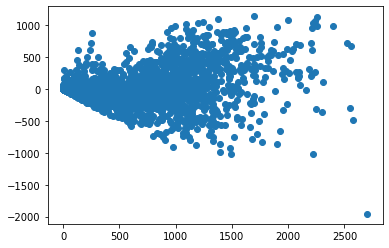

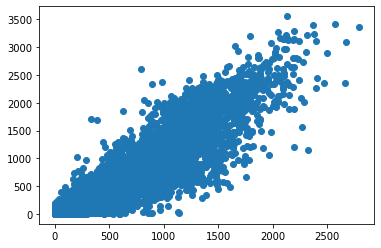

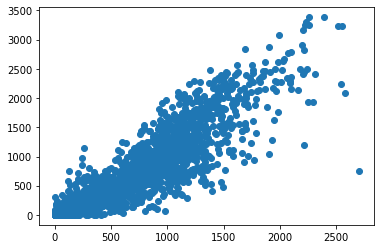

In [48]:
#Heteroscadacity
plt.scatter((y_pred_test**2),(y_test**2-y_pred_test**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of linear regression is decent with a R2 score of 0.789 on testing dataset




## LASSO REGRESSION

In [49]:
#Initialising lasso regularization regression
lasso = Lasso()
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso()

In [50]:
#Predicting y values for testing and training dataset
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [51]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_lasso**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_lasso**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_lasso**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_lasso**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_lasso**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_lasso**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'lasso regression',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)

MSE Train: 190750.1534021855
MSE Test: 187901.41846558556
RMSE Train: 436.74953165651533
RMSE Test: 433.4759721894462
MAE Train: 292.63315833807394
MAE Test: 292.478591390366
R2 Train: 0.5409734655357762
R2 Test: 0.5495156357839714
Adjusted R2 Train: 0.5306823521988856
Adjusted R2 Test: 0.5394160330364846


In [52]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_lasso[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_lasso[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

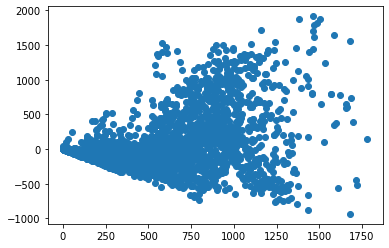

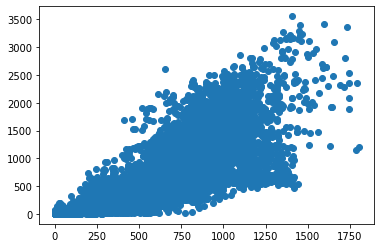

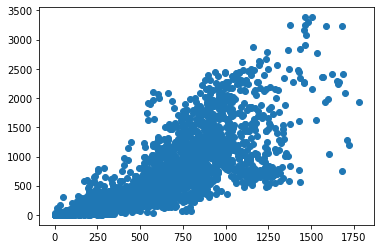

In [53]:
#Heteroscadacity
plt.scatter((y_pred_test_lasso**2),(y_test**2-y_pred_test_lasso**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_lasso**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_lasso**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of lasso regression is bad and unacceptable




## Running Grid Search Cross Validation for lasso Regression

In [54]:
#Initialising grid search cv
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.19088352955811


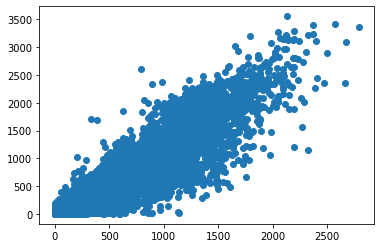

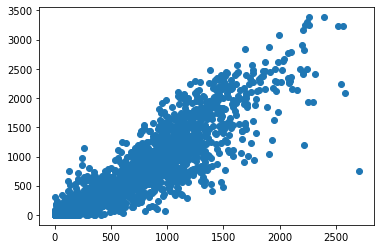

In [55]:
#Predicting the model
y_pred_train_gridlasso = lasso_regressor.predict(X_train)
y_pred_test_gridlasso = lasso_regressor.predict(X_test)
#Y predicted vs actual
plt.scatter((y_pred_train_gridlasso**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_gridlasso**2),(y_test**2))
plt.show()

In [56]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_gridlasso**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_gridlasso**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_gridlasso**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_gridlasso**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_gridlasso**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_gridlasso**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_gridlasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_gridlasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression after cross validation',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)

MSE Train: 87598.79884296305
MSE Test: 86440.60849550848
RMSE Train: 295.9709425652509
RMSE Test: 294.0078374729294
MAE Train: 201.8791902099639
MAE Test: 200.85422311190567
R2 Train: 0.7891997865326315
R2 Test: 0.7927629132417767
Adjusted R2 Train: 0.784473765866385
Adjusted R2 Test: 0.7881167758459828


In [57]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_gridlasso[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_gridlasso[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

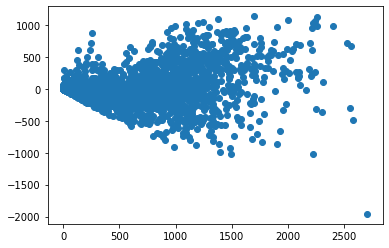

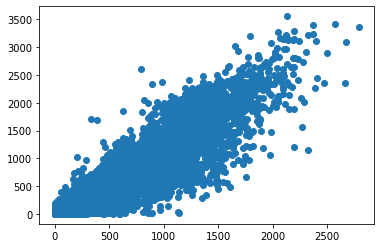

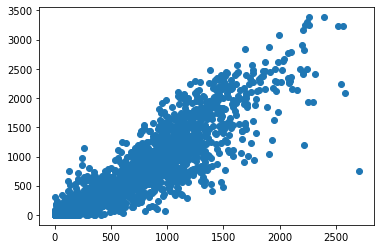

In [58]:
#Heteroscadacity
plt.scatter((y_pred_test_gridlasso**2),(y_test**2-y_pred_test_gridlasso**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_gridlasso**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_gridlasso**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of lasso after cross validation is decent and acceptable with a r2 score of 0.79



## RIDGE REGRESSION

In [59]:
#Implementing ridge ragularizatin regression
ridge= Ridge()

In [60]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge()

In [61]:
#Predicting y values for testing and training dataset
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [62]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_ridge**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_ridge**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_ridge**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_ridge**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_ridge**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_ridge**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)

MSE Train: 87603.63184953546
MSE Test: 86443.39639837373
RMSE Train: 295.97910711659273
RMSE Test: 294.0125786397135
MAE Train: 201.8859975867594
MAE Test: 200.85991370657297
R2 Train: 0.7891881562496754
R2 Test: 0.7927562293824424
Adjusted R2 Train: 0.7844618748391123
Adjusted R2 Test: 0.7881099421383309


In [63]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_ridge[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_ridge[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

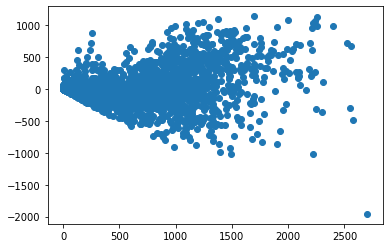

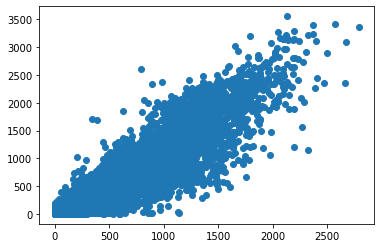

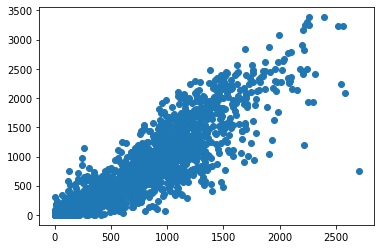

In [64]:
#Heteroscadacity
plt.scatter((y_pred_test_ridge**2),(y_test**2-y_pred_test_ridge**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_ridge**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_ridge**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of ridge is decent with a r2 score of 0.79 and it is acceptable




## Running Grid Search Cross Validation for Ridge Regression

In [65]:
# Initialising grid search 
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -30.190806516188406


In [66]:
#Model Prediction
y_pred_train_gridridge = ridge_regressor.predict(X_train)
y_pred_test_gridridge = ridge_regressor.predict(X_test)

In [67]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_gridridge**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_gridridge**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_gridridge**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_gridridge**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_gridridge**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_gridridge**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_gridridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_gridridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression after cross validation',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)

MSE Train: 87603.63184953546
MSE Test: 86443.39639837373
RMSE Train: 295.97910711659273
RMSE Test: 294.0125786397135
MAE Train: 201.8859975867594
MAE Test: 200.85991370657297
R2 Train: 0.7891881562496754
R2 Test: 0.7927562293824424
Adjusted R2 Train: 0.7844618748391123
Adjusted R2 Test: 0.7881099421383309


In [68]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_gridridge[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_gridridge[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

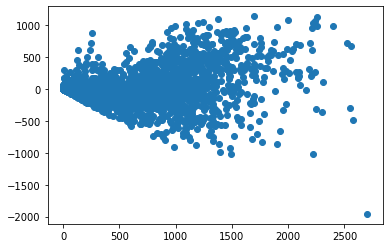

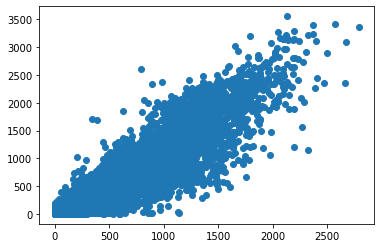

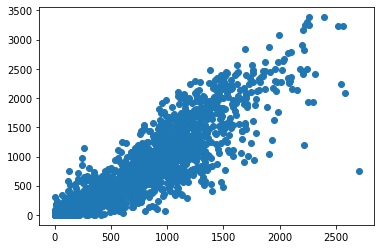

In [69]:
#Heteroscadacity
plt.scatter((y_pred_test_gridridge**2),(y_test**2-y_pred_test_gridridge**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_gridridge**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_gridridge**2),(y_test**2))
plt.show()

REMARKS:

*   Model is acceptable and decent but no major improvement is observed



## ELASTIC NET REGRESSION

In [70]:
#Initialising eleasticnet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [71]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [72]:
#Predicting y values for testing and training dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [73]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_en**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_en**2)
print("MSE Test:",MSE_lr2)

#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)

#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_en**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_en**2)
print("MAE Test:",MAE_lr2)

#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_en**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_en**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_en**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_en**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)


MSE Train: 95658.50029892015
MSE Test: 93621.75340003129
RMSE Train: 309.28708395101165
RMSE Test: 305.9767203563554
MAE Train: 209.9379529649838
MAE Test: 208.67667366371396
R2 Train: 0.7698046942500905
R2 Test: 0.7755464732432165
Adjusted R2 Train: 0.7646438466667203
Adjusted R2 Test: 0.7705143530730504


In [74]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_en[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_en[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

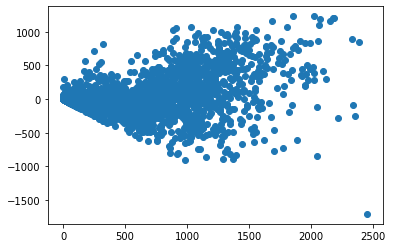

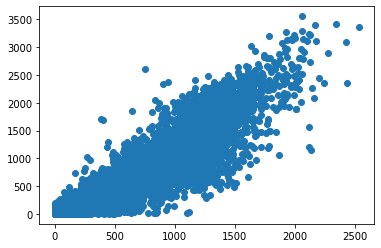

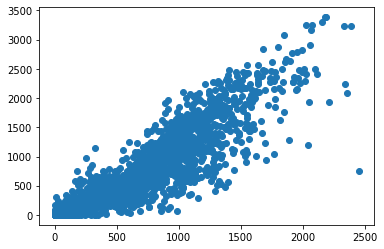

In [75]:
#Heteroscadacity
plt.scatter((y_pred_test_en**2),(y_test**2-y_pred_test_en**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_en**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_en**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of elastic net regressor is unsatisfactory




## Running Grid Search Cross Validation for ELastic Net Regression

In [76]:
# Initialising grid search 
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -30.34562398756455


In [77]:
#Model Prediction
y_pred_train_gridelastic = elastic_regressor.predict(X_train)
y_pred_test_gridelastic = elastic_regressor.predict(X_test)

In [78]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_gridelastic**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_gridelastic**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_gridelastic**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_gridelastic**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_gridelastic**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_gridelastic**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_gridelastic**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_gridelastic**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression after cross validation',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)

MSE Train: 87653.35271721032
MSE Test: 86474.50526176702
RMSE Train: 296.06308908273303
RMSE Test: 294.06547784765047
MAE Train: 201.93120672902475
MAE Test: 200.89490334706733
R2 Train: 0.789068506555181
R2 Test: 0.7926816474199343
Adjusted R2 Train: 0.7843395426666471
Adjusted R2 Test: 0.7880336880907222


In [79]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_gridelastic[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_gridelastic[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

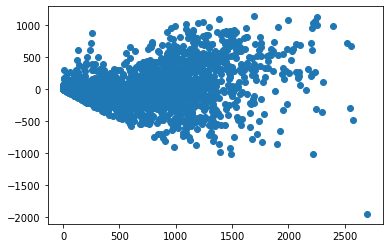

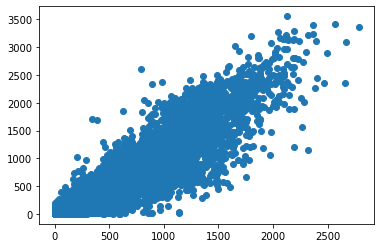

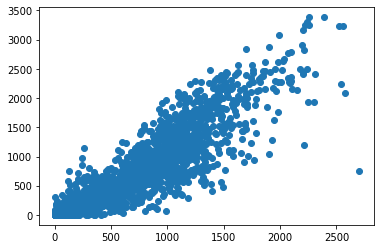

In [80]:
#Heteroscadacity
plt.scatter((y_pred_test_gridelastic**2),(y_test**2-y_pred_test_gridelastic**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_gridelastic**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_gridelastic**2),(y_test**2))
plt.show()

REMARKS:

*   The performance of elastic net regressor after cross validation is satisfactory with a R2 score of 0.79




## RANDOM FOREST

In [81]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [83]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_r**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_r**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_r**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_r**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_r**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_r**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_r**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )


# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Randon forest regression',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)


MSE Train: 4630.914184497817
MSE Test: 38431.71430861029
RMSE Train: 68.05082060120816
RMSE Test: 196.04008342328945
MAE Train: 40.27765202637523
MAE Test: 113.16200464389075
R2 Train: 0.9888560378505735
R2 Test: 0.907861864335967
Adjusted R2 Train: 0.9886061965693159
Adjusted R2 Test: 0.9057961798371937


In [84]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_r[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_r[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

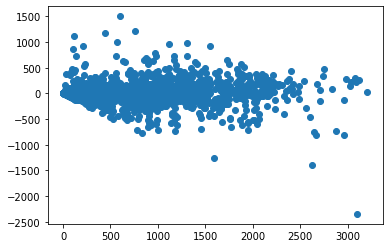

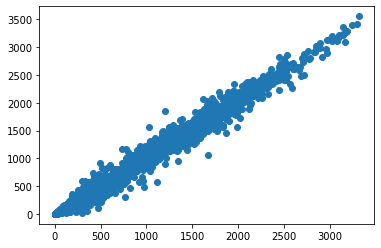

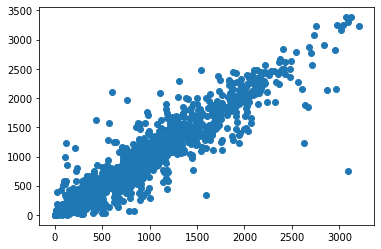

In [85]:
#Heteroscadacity
plt.scatter((y_pred_test_r**2),((y_test**2)-(y_pred_test_r**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_r**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_r**2),(y_test**2))
plt.show()

In [86]:
#Creating a temp dataframe for feature importance
importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : rf_model.feature_importances_}
importance_df = pd.DataFrame(importance_dict)

In [87]:
#Visualisation of Feature importance
temp_df=importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index()
predvsactual=px.bar(data_frame=temp_df[temp_df['Feature Importance']>0],y='Feature',x='Feature Importance',title='Feature importance plot',height=1000,width=800)
predvsactual.show()

REMARKS:

*   The performance of random forest regressor is good with a r2 score of 0.91 and the model is acceptable



## Running random Grid Search Cross Validation for random forest Regression

In [88]:
#Initialising input parameters for RandomizedSearchCV
n_estimators= [160,210,10]
max_depth = [25,35,1]
min_samples_split = [2,5,1]
min_samples_leaf = [1,5,1]
max_features= [4,10,1]
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)

{'n_estimators': [160, 210, 10], 'max_depth': [25, 35, 1], 'min_samples_split': [2, 5, 1], 'min_samples_leaf': [1, 5, 1], 'max_features': [4, 10, 1]}


In [89]:
rf_model = RandomForestRegressor()
rf_grid = RandomizedSearchCV(estimator= rf_model , param_distributions= random_grid , cv = 5, n_iter= 50 , verbose = 1)

In [90]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [25, 35, 1],
                                        'max_features': [4, 10, 1],
                                        'min_samples_leaf': [1, 5, 1],
                                        'min_samples_split': [2, 5, 1],
                                        'n_estimators': [160, 210, 10]},
                   verbose=1)

In [91]:
rf_grid.best_params_

{'max_depth': 35,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 160}

In [92]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=35, max_features=10, min_samples_split=5,
                      n_estimators=160)

In [93]:
rf_grid_best = rf_grid.best_estimator_

In [94]:
#Model prediction
y_pred_train_rgridr = rf_grid_best.predict(X_train)
y_pred_test_rgridr  = rf_grid_best.predict(X_test)

In [95]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_rgridr**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_rgridr**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_rgridr**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_rgridr**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_rgridr**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_rgridr**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_rgridr**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_rgridr**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Randon forest regression after cross validation',
       'MAE train':round((MAE_lr1),2),
       'MAE test':round((MAE_lr2),2),
       'MSE train':round((MSE_lr1),2),
       'MSE test':round((MSE_lr2),2),
       'RMSE train':round((RMSE_lr1),2),
       'RMSE test':round((RMSE_lr2),2),
       'R2_score train':round((r2_lr1),2),
       'R2_score test':round((r2_lr2),2),
       'Adjusted R2 train':round((Adjusted_R2_lr1 ),2),
       'Adjusted R2 test':round((Adjusted_R2_lr2 ),2)
       }
result_df=result_df.append(dict1,ignore_index=True)


MSE Train: 12483.837146880873
MSE Test: 42541.29720498147
RMSE Train: 111.73109301748048
RMSE Test: 206.25541739547467
MAE Train: 68.49315769127818
MAE Test: 124.98772691695757
R2 Train: 0.9699585431511227
R2 Test: 0.89800934244772
Adjusted R2 Train: 0.9692850308070097
Adjusted R2 Test: 0.895722770022447


In [96]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_rgridr[:200]**2,'Actual':np.array(y_train[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_rgridr[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

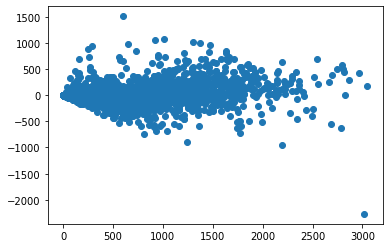

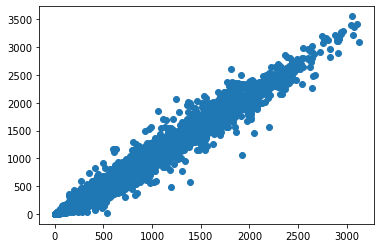

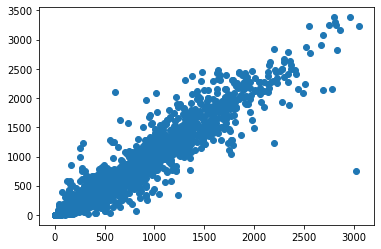

In [97]:
#Heteroscadacity
plt.scatter((y_pred_test_rgridr**2),(y_test**2-y_pred_test_rgridr**2))
plt.show()
#Y predicted vs actual
plt.scatter((y_pred_train_rgridr**2),(y_train**2))
plt.show()
plt.scatter((y_pred_test_rgridr**2),(y_test**2))
plt.show()

# Results and conclusions

In [98]:
#Visualization of evaluation scores on train dataset
temp=px.bar(data_frame=result_df,x=['MAE train','MSE train','RMSE train','R2_score train','Adjusted R2 train'],y='Model',title='RESULT VISUALISATION FOR TRAINING DATASET')
temp.show()
#Visualization of evaluation scores on test dataset
temp=px.bar(data_frame=result_df,x=['MAE test','MSE test','RMSE test','R2_score test','Adjusted R2 test'],y='Model',title='RESULT VISUALISATION FOR TESTING DATASET')
temp.show()

In [99]:
#Consolidated evaluation scores of all the models implemented
result_df

,Model,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R2_score train,R2_score test,Adjusted R2 train,Adjusted R2 test
0,Linear regression,201.94,200.88,87665.19,86495.27,296.08,294.10,0.79,0.79,0.78,0.79
1,lasso regression,292.63,292.48,190750.15,187901.42,436.75,433.48,0.54,0.55,0.53,0.54
2,Lasso regression after cross validation,201.88,200.85,87598.80,86440.61,295.97,294.01,0.79,0.79,0.78,0.79
3,Ridge regression,201.89,200.86,87603.63,86443.40,295.98,294.01,0.79,0.79,0.78,0.79
4,Ridge regression after cross validation,201.89,200.86,87603.63,86443.40,295.98,294.01,0.79,0.79,0.78,0.79
5,Elastic net regression,209.94,208.68,95658.50,93621.75,309.29,305.98,0.77,0.78,0.76,0.77
6,Elastic net regression after cross validation,201.93,200.89,87653.35,86474.51,296.06,294.07,0.79,0.79,0.78,0.79
7,Randon forest regression,40.28,113.16,4630.91,38431.71,68.05,196.04,0.99,0.91,0.99,0.91
8,Randon forest regression after cross validation,68.49,124.99,12483.84,42541.30,111.73,206.26,0.97,0.90,0.97,0.90


REMARKS:

With the data filtered for multicollinearity and features trimmed down, we ran several regression models on the features, of which Random Forest performed the best with an R2 of 0.91